#  Reporte Solución Reto Titanic

Librerías y modulos utilizados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
sns.set_theme(style="darkgrid", palette="bright")
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

##  DATOS

###  Lectura de datos

In [2]:
# Carga de la base de datos
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  Análisis de Variables

In [4]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


La variable objetivo al parecer no tiene una alta correlacion con las variables numericas del dataset, descartamos algunas de estas variables.

In [5]:
titanic=titanic.drop('PassengerId',axis=1)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Valores Faltantes

In [6]:
# Número de datos nulos por feature
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Embarked

In [7]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
titanic[titanic['Embarked'].isnull()==True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
titanic['Embarked'].fillna(value='S',inplace=True)

In [10]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

Debido al gran numero de valores faltantes en Age y en Cabin se hace un analisis un poco mas profundo sobre estas variables

### Variables Dummy (Transformación de Datos)

In [11]:
#Encoder para variables categoricas
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

#Variable Female/Male
encoder_titanic = pd.DataFrame(one_hot_encoder.fit_transform(titanic[['Sex']]).toarray())
titanic =titanic.join(encoder_titanic)
titanic.rename(columns={0:'Female',
                        1:'Male'},
               inplace=True)

#Variable Embarked
label_encoder=LabelEncoder()
titanic['Embarked']=label_encoder.fit_transform(titanic['Embarked'])


In [12]:
titanic=titanic.drop('Sex',axis=1)
titanic

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,2,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1.0,0.0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,2,1.0,0.0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,2,0.0,1.0
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,2,1.0,0.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,2,1.0,0.0
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,0.0,1.0


###  Variable Name (Transformación)

In [13]:
#Creando nueva columna para la variable nombre
titanic['Name_Pref']=np.nan

#LLenado de la variable
lista_pref=['Mr.','Miss.','Mrs.','Master.','Dr.','Capt.','Mlle.','Col.','Rev.','Major.','Mme.','Don.','Ms.','Lady.','Sir.','Countess.','Jonkheer.']
for i in range(len(titanic)):
    for j in lista_pref:
        if j in titanic['Name'][i]:
            titanic['Name_Pref'][i]=j

c:\users\mariana\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\mariana\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


###  Limpieza de Datos y Selección de Variables

In [14]:
titanic['Name_Pref']=label_encoder.fit_transform(titanic['Name_Pref'])
titanic=titanic.drop(['Name','Ticket'],axis=1)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Female,Male,Name_Pref
0,0,3,22.0,1,0,7.2500,NaN,2,0.0,1.0,12
1,1,1,38.0,1,0,71.2833,C85,0,1.0,0.0,13
2,1,3,26.0,0,0,7.9250,NaN,2,1.0,0.0,9
3,1,1,35.0,1,0,53.1000,C123,2,1.0,0.0,13
4,0,3,35.0,0,0,8.0500,NaN,2,0.0,1.0,12
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,2,0.0,1.0,15
887,1,1,19.0,0,0,30.0000,B42,2,1.0,0.0,9
888,0,3,NaN,1,2,23.4500,NaN,2,1.0,0.0,9
889,1,1,26.0,0,0,30.0000,C148,0,0.0,1.0,12


In [15]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Female,Male,Name_Pref
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.167675,0.543351,-0.543351,-0.201345
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.162098,-0.131900,0.131900,0.045541
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.030394,-0.093254,0.093254,0.294111
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.068230,0.114631,-0.114631,-0.191786
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.039798,0.245489,-0.245489,-0.119721
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.224719,0.182333,-0.182333,-0.086359
Embarked,-0.167675,0.162098,-0.030394,0.068230,0.039798,-0.224719,1.000000,-0.108262,0.108262,0.066462
Female,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,-0.108262,1.000000,-1.000000,-0.256407
Male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,0.108262,-1.000000,1.000000,0.256407
Name_Pref,-0.201345,0.045541,0.294111,-0.191786,-0.119721,-0.086359,0.066462,-0.256407,0.256407,1.000000


In [16]:
#Mantener Mayores Correlaciones (Pclass,Fare,Embarked,Female,Male,Name_Pref)
titanic=titanic.drop(['Age','SibSp','Parch'],axis=1)
titanic

,Survived,Pclass,Fare,Cabin,Embarked,Female,Male,Name_Pref
0,0,3,7.2500,NaN,2,0.0,1.0,12
1,1,1,71.2833,C85,0,1.0,0.0,13
2,1,3,7.9250,NaN,2,1.0,0.0,9
3,1,1,53.1000,C123,2,1.0,0.0,13
4,0,3,8.0500,NaN,2,0.0,1.0,12
...,...,...,...,...,...,...,...,...
886,0,2,13.0000,NaN,2,0.0,1.0,15
887,1,1,30.0000,B42,2,1.0,0.0,9
888,0,3,23.4500,NaN,2,1.0,0.0,9
889,1,1,30.0000,C148,0,0.0,1.0,12


La variable edad puede ser llenada por medio de diversos metodos, como KKN, Regresion Lineal, Media, etc

### Valores Faltantes P2

### Edad

In [16]:
## Se elimina Edad

### Cabin
Por el momento la variable Cabin sera eliminada

In [17]:
titanic=titanic.drop(['Cabin'],axis=1)
titanic

,Survived,Pclass,Fare,Embarked,Female,Male,Name_Pref
0,0,3,7.2500,2,0.0,1.0,12
1,1,1,71.2833,0,1.0,0.0,13
2,1,3,7.9250,2,1.0,0.0,9
3,1,1,53.1000,2,1.0,0.0,13
4,0,3,8.0500,2,0.0,1.0,12
...,...,...,...,...,...,...,...
886,0,2,13.0000,2,0.0,1.0,15
887,1,1,30.0000,2,1.0,0.0,9
888,0,3,23.4500,2,1.0,0.0,9
889,1,1,30.0000,0,0.0,1.0,12


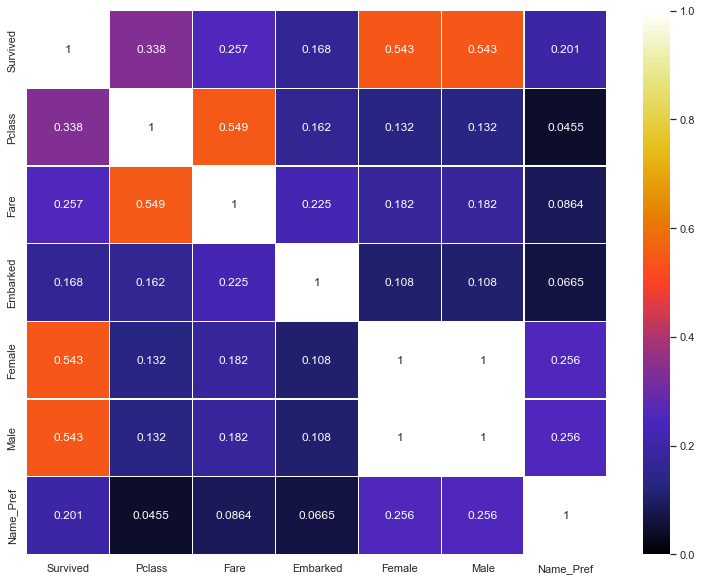

In [39]:
sns.set(rc = {'figure.figsize':(13,10)})
ax = sns.heatmap(abs(titanic.corr()), vmin=0, vmax=1,annot=True,linewidths=.3,cmap="CMRmap",fmt='.3g')
plt.savefig('corr_matriz.png',dpi=96)

### Outliers

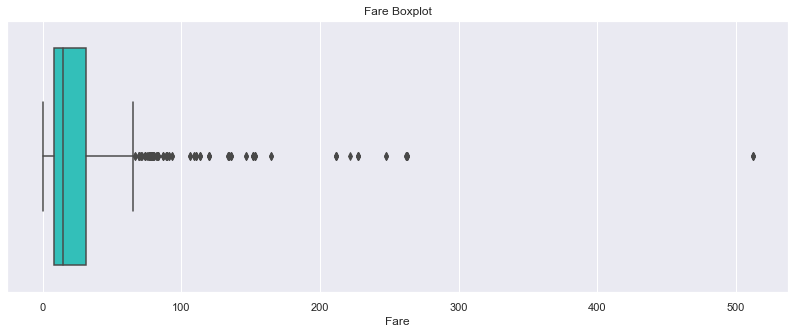

In [54]:
#Pensar Implementar Despues
sns.set(rc = {'figure.figsize':(14,5)})
sns.boxplot(x=titanic["Fare"],color='#1CD6CE').set(title='Fare Boxplot')
plt.savefig('fareboxplot.png',dpi=120)

##  MODELADO Y EVALUACIÓN

### Variable Predictora y Predictores

In [86]:
X = titanic.drop(['Survived'],axis=1)
y = titanic['Survived']

### Datos de entrenamiento, validacion y testeo

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### Decision Tree

In [57]:
# Se guarda el modelo en una variable
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Se entrena el modelo de árbol de decisión
decision_tree = decision_tree.fit(X_train,y_train)

In [58]:
y_pred = decision_tree.predict(X_test)

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8222222222222222


In [60]:
confusion_matrix(y_test, y_pred)

array([[45,  9],
       [ 7, 29]], dtype=int64)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        54
           1       0.76      0.81      0.78        36

    accuracy                           0.82        90
   macro avg       0.81      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



### Random Forest

In [75]:
random_forest= RandomForestClassifier(max_depth=10, random_state=42,n_estimators=2000)
random_forest=random_forest.fit(X_train, y_train)

In [76]:
y_pred = random_forest.predict(X_test)

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8222222222222222


In [78]:
confusion_matrix(y_test, y_pred)

array([[44, 10],
       [ 6, 30]], dtype=int64)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        54
           1       0.75      0.83      0.79        36

    accuracy                           0.82        90
   macro avg       0.81      0.82      0.82        90
weighted avg       0.83      0.82      0.82        90



### SVM

In [80]:
s_vm= svm.SVC(kernel='linear')
s_vm=s_vm.fit(X_train, y_train)

In [81]:
y_pred = s_vm.predict(X_test)

In [82]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8111111111111111


### KNN

In [83]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh = neigh.fit(X_train, y_train)

In [84]:
y_pred = neigh.predict(X_test)

In [85]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7444444444444445


## Datos Test (Limpieza y Modelado)

In [87]:
titanic_test = pd.read_csv("test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
titanic_test=titanic_test.drop('PassengerId',axis=1)
titanic_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [89]:
# Número de datos nulos por feature
titanic_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [90]:
titanic_test[titanic_test['Fare'].isnull()==True]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [91]:
titanic_test.groupby("Pclass")["Fare"].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [92]:
titanic_test['Fare'].fillna(value=12.45,inplace=True)

In [93]:
titanic_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [94]:
#Encoder para variables categoricas
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

#Variable Female/Male
encoder_titanic = pd.DataFrame(one_hot_encoder.fit_transform(titanic_test[['Sex']]).toarray())
titanic_test =titanic_test.join(encoder_titanic)
titanic_test.rename(columns={0:'Female',
                        1:'Male'},
               inplace=True)

#Variable Embarked
label_encoder=LabelEncoder()
titanic_test['Embarked']=label_encoder.fit_transform(titanic_test['Embarked'])

In [95]:
titanic_test=titanic_test.drop('Sex',axis=1)
titanic_test

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male
0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,0.0,1.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,2,1.0,0.0
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,0.0,1.0
3,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,2,0.0,1.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,2,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,2,0.0,1.0
414,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,1.0,0.0
415,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,0.0,1.0
416,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,2,0.0,1.0


In [96]:
#Creando nueva columna para la variable nombre
titanic_test['Name_Pref']=np.nan

#LLenado de la variable
lista_pref=['Mr.','Miss.','Mrs.','Master.','Dr.','Capt.','Mlle.','Col.','Rev.','Major.','Mme.','Don.','Ms.','Lady.','Sir.','Countess.','Jonkheer.']
for i in range(len(titanic_test)):
    for j in lista_pref:
        if j in titanic_test['Name'][i]:
            titanic_test['Name_Pref'][i]=j

c:\users\mariana\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\mariana\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [97]:
titanic_test[titanic_test['Name_Pref'].isnull()==True]

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male,Name_Pref
414,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9,C105,0,1.0,0.0,NaN


In [98]:
titanic_test['Name_Pref'].fillna(value='Dona.',inplace=True)

In [99]:
titanic_test

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male,Name_Pref
0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,0.0,1.0,Mr.
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,2,1.0,0.0,Mrs.
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,0.0,1.0,Mr.
3,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,2,0.0,1.0,Mr.
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,2,1.0,0.0,Mrs.
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,2,0.0,1.0,Mr.
414,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,1.0,0.0,Dona.
415,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,0.0,1.0,Mr.
416,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,2,0.0,1.0,Mr.


In [100]:
name_pref_dict={'Capt.':0,'Col.':1,'Countess.':2,'Don.':3,'Dr.':4,'Jonkheer.':5,'Lady.':6,'Major.':7,'Master.':8,'Miss.':9,'Mlle.':10,'Mme.':11,'Mr.':12,'Mrs.':13,'Ms.':14,'Rev.':15,'Sir.':16,'Dona.':17}
titanic_test['Name_Pref']=titanic_test.Name_Pref.map(name_pref_dict)
titanic_test=titanic_test.drop(['Name','Ticket'],axis=1)
titanic_test

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Female,Male,Name_Pref
0,3,34.5,0,0,7.8292,NaN,1,0.0,1.0,12
1,3,47.0,1,0,7.0000,NaN,2,1.0,0.0,13
2,2,62.0,0,0,9.6875,NaN,1,0.0,1.0,12
3,3,27.0,0,0,8.6625,NaN,2,0.0,1.0,12
4,3,22.0,1,1,12.2875,NaN,2,1.0,0.0,13
...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,NaN,2,0.0,1.0,12
414,1,39.0,0,0,108.9000,C105,0,1.0,0.0,17
415,3,38.5,0,0,7.2500,NaN,2,0.0,1.0,12
416,3,NaN,0,0,8.0500,NaN,2,0.0,1.0,12


In [101]:
#Mantener Mayores Correlaciones (Pclass,Fare,Embarked,Female,Male,Name_Pref)
titanic_test=titanic_test.drop(['Age','SibSp','Parch'],axis=1)
titanic_test

,Pclass,Fare,Cabin,Embarked,Female,Male,Name_Pref
0,3,7.8292,NaN,1,0.0,1.0,12
1,3,7.0000,NaN,2,1.0,0.0,13
2,2,9.6875,NaN,1,0.0,1.0,12
3,3,8.6625,NaN,2,0.0,1.0,12
4,3,12.2875,NaN,2,1.0,0.0,13
...,...,...,...,...,...,...,...
413,3,8.0500,NaN,2,0.0,1.0,12
414,1,108.9000,C105,0,1.0,0.0,17
415,3,7.2500,NaN,2,0.0,1.0,12
416,3,8.0500,NaN,2,0.0,1.0,12


In [102]:
titanic_test=titanic_test.drop(['Cabin'],axis=1)
titanic_test

,Pclass,Fare,Embarked,Female,Male,Name_Pref
0,3,7.8292,1,0.0,1.0,12
1,3,7.0000,2,1.0,0.0,13
2,2,9.6875,1,0.0,1.0,12
3,3,8.6625,2,0.0,1.0,12
4,3,12.2875,2,1.0,0.0,13
...,...,...,...,...,...,...
413,3,8.0500,2,0.0,1.0,12
414,1,108.9000,0,1.0,0.0,17
415,3,7.2500,2,0.0,1.0,12
416,3,8.0500,2,0.0,1.0,12


In [103]:
x_test=titanic_test
x_test

,Pclass,Fare,Embarked,Female,Male,Name_Pref
0,3,7.8292,1,0.0,1.0,12
1,3,7.0000,2,1.0,0.0,13
2,2,9.6875,1,0.0,1.0,12
3,3,8.6625,2,0.0,1.0,12
4,3,12.2875,2,1.0,0.0,13
...,...,...,...,...,...,...
413,3,8.0500,2,0.0,1.0,12
414,1,108.9000,0,1.0,0.0,17
415,3,7.2500,2,0.0,1.0,12
416,3,8.0500,2,0.0,1.0,12


### Random Forest

In [104]:
random_forest= RandomForestClassifier(max_depth=10, random_state=0,n_estimators=2000)
random_forest=random_forest.fit(X_train, y_train)

In [105]:
y_pred = decision_tree.predict(x_test)

In [107]:
test = pd.read_csv('test.csv')
resultados = pd.DataFrame(test['PassengerId'])
resultados

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [108]:
resultados['Survived'] = y_pred
resultados=resultados.set_index("PassengerId")
resultados

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [109]:
resultados.to_csv('PruebaUnoXtYt.csv')

### Decision Tree

In [110]:
# Se guarda el modelo en una variable
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Se entrena el modelo de árbol de decisión
decision_tree = decision_tree.fit(X,y)

In [111]:
y_pred = decision_tree.predict(x_test)

In [112]:
np.count_nonzero((y_pred == 1))

144

In [113]:
np.count_nonzero((y_pred == 0))

274

In [114]:
test = pd.read_csv('test.csv')
resultados = pd.DataFrame(test['PassengerId'])
resultados

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [115]:
resultados['Survived'] = y_pred
resultados=resultados.set_index("PassengerId")
resultados

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [116]:
resultados.to_csv('PruebaUnoXYtree6.csv')

###  SVM

In [117]:
s_vm= svm.SVC(kernel='linear')
s_vm=s_vm.fit(X, y)

In [118]:
y_pred = s_vm.predict(x_test)

In [119]:
np.count_nonzero((y_pred == 1))

152

In [120]:
np.count_nonzero((y_pred == 0))

266

In [121]:
test = pd.read_csv('test.csv')
resultados = pd.DataFrame(test['PassengerId'])
resultados

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [122]:
resultados['Survived'] = y_pred
resultados=resultados.set_index("PassengerId")
resultados

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [123]:
resultados.to_csv('PruebaUnoXYsvm.csv')

###  Red Neuronal

In [126]:
modelo_1 = MLPClassifier(
                hidden_layer_sizes=(5),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123)


modelo_1.fit(X=X_train, y=y_train)


MLPClassifier(hidden_layer_sizes=5, learning_rate_init=0.01, max_iter=1000,
              random_state=123, solver='lbfgs')

In [127]:
y_pred=modelo_1.predict(x_test)

In [129]:
np.count_nonzero((y_pred == 0))

237

In [130]:
np.count_nonzero((y_pred == 1))

181

In [131]:
test = pd.read_csv('test.csv')
resultados = pd.DataFrame(test['PassengerId'])
resultados

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [132]:
resultados['Survived'] = y_pred
resultados=resultados.set_index("PassengerId")
resultados

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [133]:
resultados['Survived'].value_counts()

0    237
1    181
Name: Survived, dtype: int64

In [134]:
resultados.to_csv('PruebaUnoXtYtrn.csv')

In [135]:
modelo_3 = MLPClassifier(
                hidden_layer_sizes=(20, 20),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )
modelo_3.fit(X=X, y=y)

MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

In [136]:
y_pred=modelo_3.predict(x_test)

In [137]:
np.count_nonzero((y_pred == 0))

291

In [138]:
np.count_nonzero((y_pred == 1))

127

In [139]:
test = pd.read_csv('test.csv')
resultados = pd.DataFrame(test['PassengerId'])
resultados

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [140]:
resultados['Survived'] = y_pred
resultados=resultados.set_index("PassengerId")
resultados

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [141]:
resultados['Survived'].value_counts()

0    291
1    127
Name: Survived, dtype: int64

In [142]:
resultados.to_csv('PruebaUnoXtYtrn20.csv')

In [143]:
modelo_4 = MLPClassifier(
                hidden_layer_sizes=(50, 50, 50),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )
modelo_4.fit(X=X, y=y)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

In [144]:
y_pred=modelo_4.predict(x_test)

In [145]:
np.count_nonzero((y_pred == 0))

277

In [146]:
np.count_nonzero((y_pred == 1))

141

In [147]:
test = pd.read_csv('test.csv')
resultados = pd.DataFrame(test['PassengerId'])
resultados

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [148]:
resultados['Survived'] = y_pred
resultados=resultados.set_index("PassengerId")
resultados

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [149]:
resultados['Survived'].value_counts()

0    277
1    141
Name: Survived, dtype: int64

In [150]:
resultados.to_csv('PruebaUnoXYrn50.csv')

## REFINAMIENTO

In [166]:
param_grid = {'hidden_layer_sizes':[1, 5, 10, 15, 25, 50,60]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        learning_rate_init=0.01,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X, y)

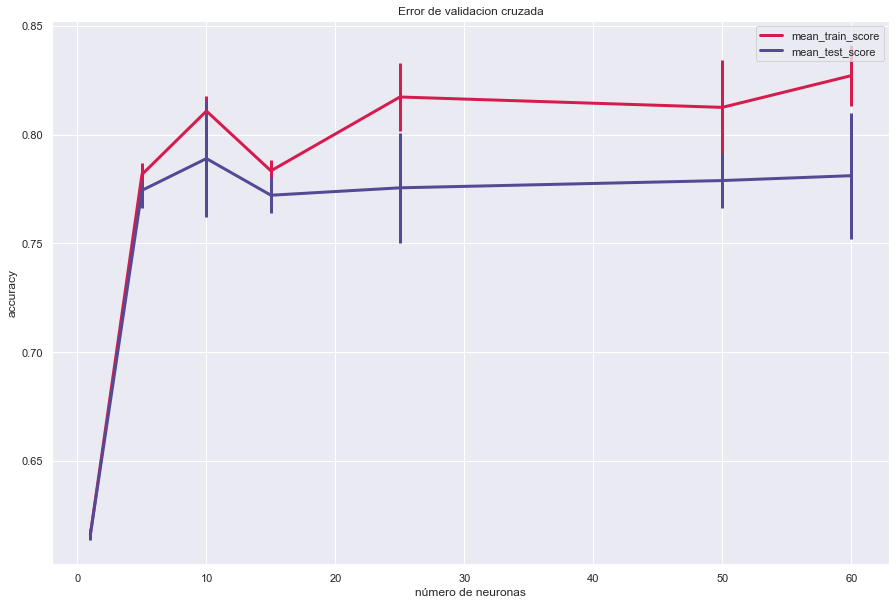

In [171]:
fig, ax = plt.subplots(figsize=(15, 10))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax,color='#D61C4E',linewidth=3)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax,color='#554994',linewidth=3)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada');
plt.savefig('error_capas.png',dpi=180)

In [173]:
# learning rate
# ==============================================================================
param_grid = {'learning_rate_init':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        hidden_layer_sizes=(25),
                        solver = 'adam',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X, y)

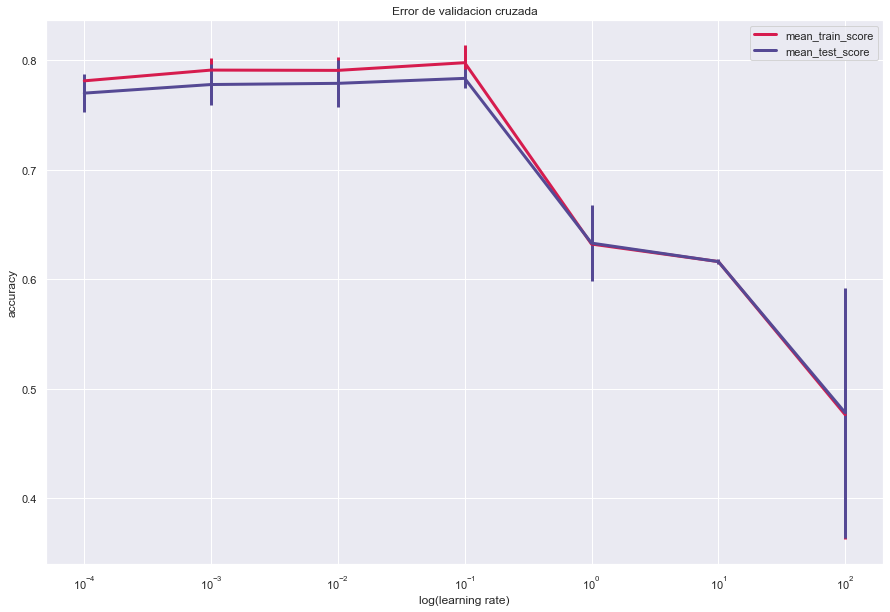

In [174]:
fig, ax = plt.subplots(figsize=(15, 10))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate_init', y='mean_train_score', yerr='std_train_score', ax=ax,color='#D61C4E',linewidth=3)
scores.plot(x='param_learning_rate_init', y='mean_test_score', yerr='std_test_score', ax=ax,color='#554994',linewidth=3)
ax.set_xscale('log')
ax.set_xlabel('log(learning rate)')
ax.set_ylabel('accuracy')
ax.set_title('Error de validacion cruzada');
plt.savefig('error_rn_step.png',dpi=180)

In [175]:
modelo_5 = MLPClassifier(
                hidden_layer_sizes=(25, 25, 25),
                learning_rate_init=0.001,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )
modelo_5.fit(X=X, y=y)

MLPClassifier(hidden_layer_sizes=(25, 25, 25), max_iter=5000, random_state=123,
              solver='lbfgs')

In [176]:
y_pred=modelo_5.predict(x_test)

In [177]:
np.count_nonzero((y_pred == 0))

280

In [178]:
np.count_nonzero((y_pred == 1))

138

In [179]:
test = pd.read_csv('test.csv')
resultados = pd.DataFrame(test['PassengerId'])
resultados

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [180]:
resultados['Survived'] = y_pred
resultados=resultados.set_index("PassengerId")
resultados

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [181]:
resultados['Survived'].value_counts()

0    280
1    138
Name: Survived, dtype: int64

In [183]:
resultados.to_csv('PruebaUnoXYrn251.csv')

### Otros modelos

#### XGboost Modelado

In [186]:
boosting_classifier= GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1,max_depth=1, random_state=0)
boosting_classifier=boosting_classifier.fit(X_train, y_train)

#### XGboost Evaluación

In [187]:
boosting_classifier.score(X_test, y_test)

0.8333333333333334

#### XGboost Refinamiento

In [202]:
estimators_scores=[]
for i in range (1000,12000,1000):
    boosting_classifier= GradientBoostingClassifier(n_estimators=i, learning_rate=1,max_depth=1, random_state=0)
    boosting_classifier=boosting_classifier.fit(X_train, y_train)
    estimators_scores.append(boosting_classifier.score(X_test, y_test))

In [189]:
rate_values=[0.0001,0.001,0.01,0.1,0.5,1,10,100]
rate_scores=[]
for i in rate_values:
    boosting_classifier= GradientBoostingClassifier(n_estimators=1000, learning_rate=i,max_depth=1, random_state=0)
    boosting_classifier=boosting_classifier.fit(X_train, y_train)
    rate_scores.append(boosting_classifier.score(X_test, y_test))

In [190]:
depth_values=[1,2,3,4,5,6,7,8,9,10,15,20,50,100]
depth_scores=[]
for i in depth_values:
    boosting_classifier= GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1,max_depth=i, random_state=0)
    boosting_classifier=boosting_classifier.fit(X_train, y_train)
    depth_scores.append(boosting_classifier.score(X_test, y_test))

#### XGboost Modelo Final

In [191]:
boosting_classifier= GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1,max_depth=1, random_state=0)
boosting_classifier=boosting_classifier.fit(X, y)

In [192]:
y_pred=boosting_classifier.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [193]:
x_test.shape

(418, 6)

In [194]:
np.count_nonzero((y_pred == 0))

266

In [195]:
np.count_nonzero((y_pred == 1))

152

In [196]:
test = pd.read_csv('test.csv')
resultados = pd.DataFrame(test['PassengerId'])
resultados

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [197]:
resultados['Survived'] = y_pred
resultados=resultados.set_index("PassengerId")
resultados

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [198]:
resultados['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [199]:
resultados.to_csv('PruebaUnoXYgb.csv')